In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('online.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data['date'] = pd.to_datetime(data.InvoiceDate)

In [ ]:
#look at head
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom,2010-01-12 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom,2010-01-12 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom,2010-01-12 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom,2010-01-12 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom,2010-01-12 08:26:00


In [ ]:
#drop rows with no customer id's
data = data.dropna(subset= 'CustomerID')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  object        
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   date         406829 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


In [ ]:
#create a month invoice
import datetime as dt
#function for month
def get_month(x):
  return dt.datetime(x.year, x.month, 1)



In [ ]:
data['InvoiceMonth'] = data['date'].apply(get_month)


In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,InvoiceMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/11 12:50,0.85,12680.0,France,2011-09-12 12:50:00,2011-09-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/11 12:50,2.10,12680.0,France,2011-09-12 12:50:00,2011-09-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/11 12:50,4.15,12680.0,France,2011-09-12 12:50:00,2011-09-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/11 12:50,4.15,12680.0,France,2011-09-12 12:50:00,2011-09-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/11 12:50,4.95,12680.0,France,2011-09-12 12:50:00,2011-09-01


### Creating Cohort Month
For the first time when we acquired the customer we need to find that.

In [ ]:
#create a column index with the minimum invoice date aka first time customer was acquired
data['Cohort_Month'] = data.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [ ]:
data.head()

In [ ]:
#create a date element function to get a series for. substraction
def get_date_elements(df, columns):
  day = df[columns].dt.day
  month = df[columns].dt.month
  year = df[columns].dt.year

  return day, month, year


In [ ]:
#get date elements for our cohort and invoice columns
_,Invoice_month,Invoice_year = get_date_elements(data, 'InvoiceMonth')
_,Cohort_month,Cohort_year = get_date_elements(data, 'Cohort_Month')

In [ ]:
Cohort_year[:10]

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: Cohort_Month, dtype: int64

In [ ]:
#create a cohort index
year_diff = Invoice_year - Cohort_year #LAST TIME THEY WERE ACTIVE - the first time they were active
month_diff = Invoice_month - Cohort_month
data['Cohort_index'] = year_diff * 12 + month_diff +1
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,InvoiceMonth,Cohort_Month,Cohort_index
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/11 12:50,0.85,12680.0,France,2011-09-12 12:50:00,2011-09-01,2011-08-01,2
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/11 12:50,2.10,12680.0,France,2011-09-12 12:50:00,2011-09-01,2011-08-01,2
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/11 12:50,4.15,12680.0,France,2011-09-12 12:50:00,2011-09-01,2011-08-01,2
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/11 12:50,4.15,12680.0,France,2011-09-12 12:50:00,2011-09-01,2011-08-01,2
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/11 12:50,4.95,12680.0,France,2011-09-12 12:50:00,2011-09-01,2011-08-01,2


### Creating a Pivot Table

In [ ]:
#count the custmer id's by grouping by Cohort Month
cohort_data= data.groupby(['Cohort_Month', 'Cohort_index'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort_Month,Cohort_index,CustomerID
0,2010-01-01,1,98
1,2010-01-01,2,9
2,2010-01-01,3,4
3,2010-01-01,5,7
4,2010-01-01,6,7
...,...,...,...
246,2011-10-01,2,50
247,2011-10-01,3,10
248,2011-11-01,1,218
249,2011-11-01,2,10


In [ ]:
#create a pivot table
cohort_table = cohort_data.pivot(index='Cohort_Month', columns= ['Cohort_index'], values= 'CustomerID')
cohort_table

<Axes: xlabel='Cohort_index', ylabel='Cohort_Month'>

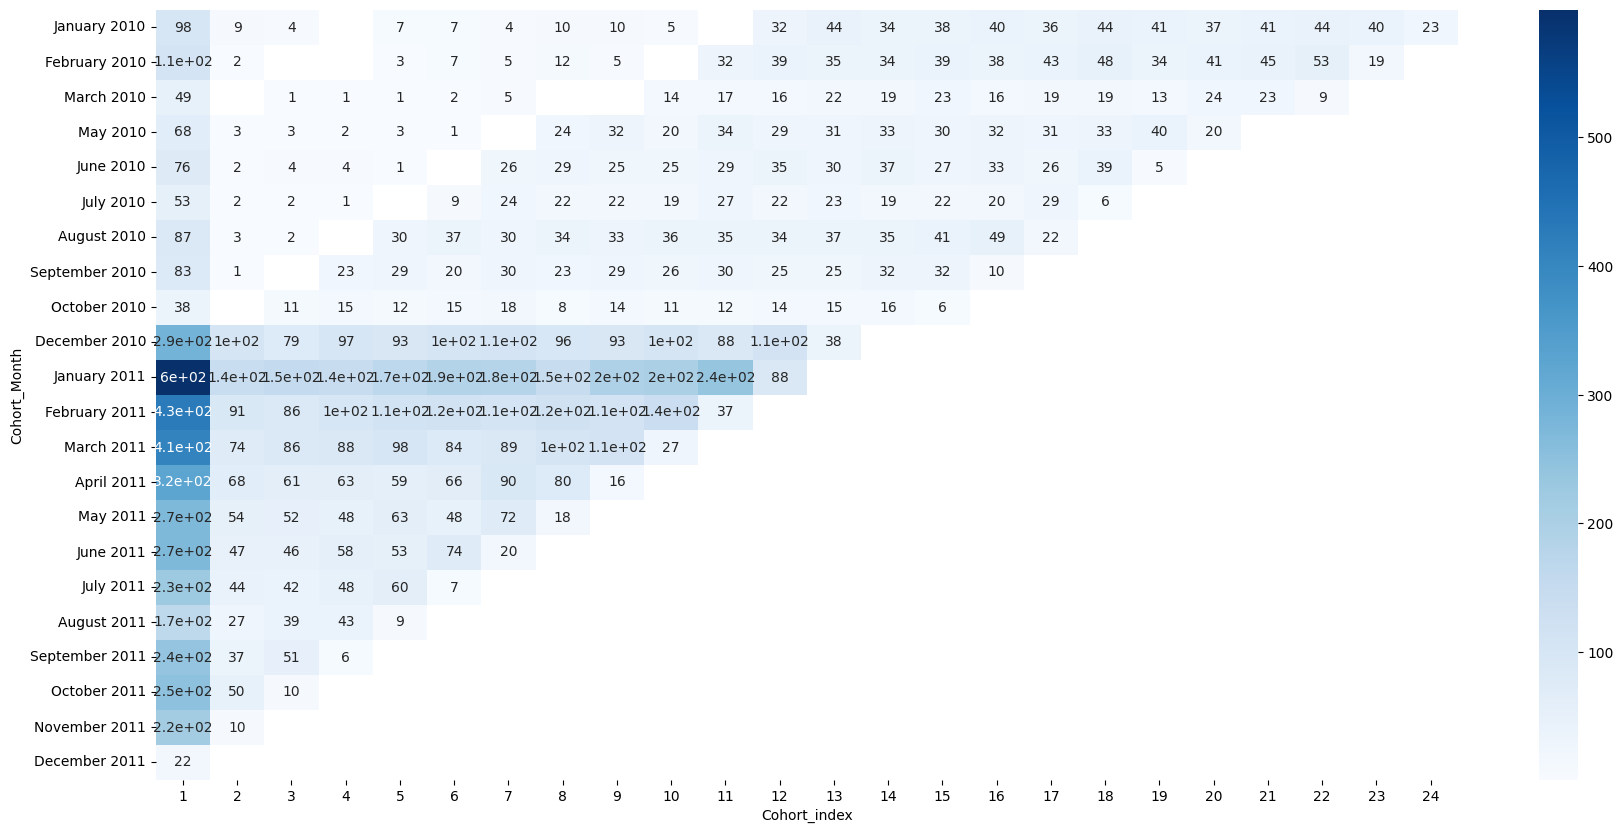

In [ ]:
#chnage index
#cohort_table.index = cohort_table.index.strftime('%B %Y')
#heat map
plt.figure(figsize = (21,10))
sns.heatmap(cohort_table, annot = True, cmap = 'Blues')


In [ ]:
#cohort table for percentages
new = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)
new

<Axes: xlabel='Cohort_index', ylabel='Cohort_Month'>

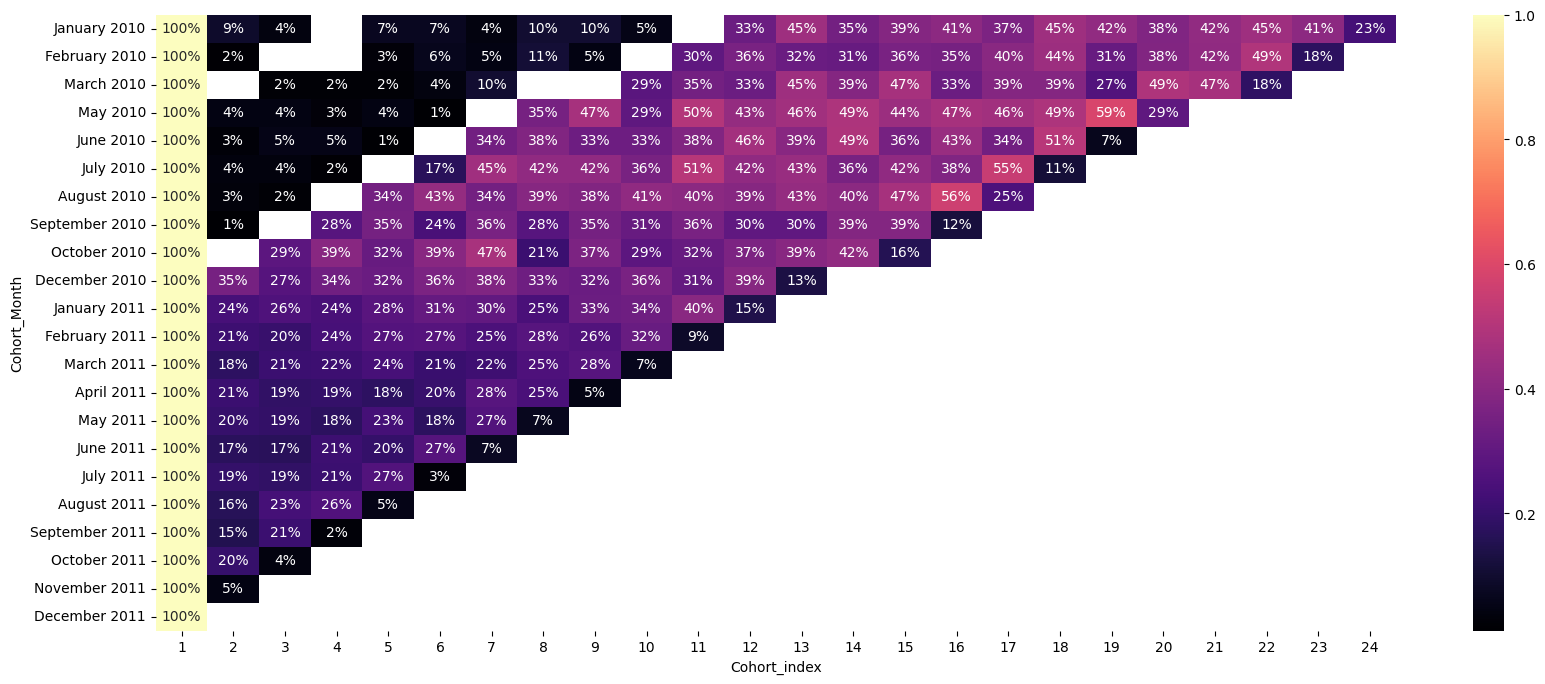

In [ ]:
#create percentages visual


plt.figure(figsize = (20,8))
sns.heatmap(new, annot = True, cmap = 'magma',fmt= '.0%')